# Titanic - Final Project Notebook
Masters (Business Analytics and Big Data)
Students:
1. Daniela Jaimes Delgado
2. Zakra Chachar

##Introduction - Data Overview

###Data Dictionary for the Titanic Dataset (df_titanic)

PassengerId: Unique identifier assigned to each passenger.

Survived: Indicates if the passenger survived the Titanic disaster (0 = No, 1 = Yes).

Pclass: Ticket class, serves as a proxy for socio-economic status (1 = 1st Class, 2 = 2nd Class, 3 = 3rd Class).

Name: Full name of the passenger.

Sex: Gender of the passenger (male or female).

Age: Age of the passenger, fractional if less than one year. If the age is estimated, it appears as xx.5.

SibSp: Number of siblings or spouses aboard the Titanic.

Parch: Number of parents or children aboard the Titanic.

Ticket: Ticket number.

Fare: Passenger fare.

Cabin: Cabin number.

Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [0]:
#matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [0]:
# File location and type
file_location = "/FileStore/tables/train.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df_titanic = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df_titanic)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,null,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,null,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,null,S
6,0,3,"Moran, Mr. James",male,null,0,0,330877,8.4583,null,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,null,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,null,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,null,C


In [0]:
df_titanic.dtypes

[('PassengerId', 'string'),
 ('Survived', 'string'),
 ('Pclass', 'string'),
 ('Name', 'string'),
 ('Sex', 'string'),
 ('Age', 'string'),
 ('SibSp', 'string'),
 ('Parch', 'string'),
 ('Ticket', 'string'),
 ('Fare', 'string'),
 ('Cabin', 'string'),
 ('Embarked', 'string')]

##Data Transformation

###Transforming data types

Converted several key variables—'Age', 'Fare', 'Survived', 'Pclass', 'SibSp', and 'Parch' from strings to double type. 

This conversion is essential for ensuring that our data is compatible with the statistical models and machine learning algorithms we use ahead.

In [0]:
from pyspark.sql.functions import col  # Ensuring col is imported
from pyspark.sql.types import DoubleType, DoubleType

df_titanic = df_titanic.withColumn("Age", col("Age").cast(DoubleType()))
df_titanic = df_titanic.withColumn("Fare", col("Fare").cast(DoubleType()))
df_titanic = df_titanic.withColumn("Survived", col("Survived").cast(DoubleType()))
df_titanic = df_titanic.withColumn("Pclass", col("Pclass").cast(DoubleType()))
df_titanic = df_titanic.withColumn("SibSp", col("SibSp").cast(DoubleType()))
df_titanic = df_titanic.withColumn("Parch", col("Parch").cast(DoubleType()))

df_titanic.dtypes

[('PassengerId', 'string'),
 ('Survived', 'double'),
 ('Pclass', 'double'),
 ('Name', 'string'),
 ('Sex', 'string'),
 ('Age', 'double'),
 ('SibSp', 'double'),
 ('Parch', 'double'),
 ('Ticket', 'string'),
 ('Fare', 'double'),
 ('Cabin', 'string'),
 ('Embarked', 'string')]

In [0]:
df_titanic.describe().head()

Row(summary='count', PassengerId='891', Survived='891', Pclass='891', Name='891', Sex='891', Age='714', SibSp='891', Parch='891', Ticket='891', Fare='891', Cabin='204', Embarked='889')

###Data Imputation for age

The 'Age' variable contained missing values, which necessitate handling to ensure the robustness of our statistical analyses and machine learning models. We opted to use imputation with the mean age to address these gaps. This method replaces missing age values with the average age from the dataset, preserving the overall age distribution and statistical characteristics. By implementing this approach, we mitigate the risk of bias that could arise from excluding passengers with missing age data and maintain a larger dataset for more accurate and generalizable insights. 

In [0]:
from pyspark.ml.feature import Imputer
from pyspark.sql.functions import col, isnull

# Null values in "Age" (Imputation with mean)
df_age = df_titanic.withColumn("Age_imputed", col("Age"))  # Use existing Age column
imputer = Imputer(inputCol="Age", outputCol="Age_imputed", strategy="mean")
df_age = imputer.fit(df_age).transform(df_age)

display(df_age)


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imputed
1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,null,S,22.0
2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,38.0
3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.925,null,S,26.0
4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1,C123,S,35.0
5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.05,null,S,35.0
6,0.0,3.0,"Moran, Mr. James",male,null,0.0,0.0,330877,8.4583,null,Q,29.69911764705882
7,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,54.0
8,0.0,3.0,"Palsson, Master. Gosta Leonard",male,2.0,3.0,1.0,349909,21.075,null,S,2.0
9,1.0,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0.0,2.0,347742,11.1333,null,S,27.0
10,1.0,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1.0,0.0,237736,30.0708,null,C,14.0


###Creating Numerical Features

To ensure compatibility with machine learning algorithms, we converted the 'Sex' and 'Embarked' categorical variables into numerical formats using PySpark's StringIndexer. The resulting DataFrame, df_num_titanic, includes the new columns 'sex_index' and 'embarked_index', which provide numerical representations of the original categories. 

In [0]:
from pyspark.ml.feature import StringIndexer
from pyspark.sql.functions import col, isnull

df_filtered = df_age.filter(col("Embarked").isNotNull())

sex_indexer = StringIndexer(inputCol="Sex", outputCol="sex_index")
embarked_indexer = StringIndexer(inputCol="Embarked", outputCol="embarked_index")

df_num_titanic = sex_indexer.fit(df_filtered).transform(df_filtered)
df_num_titanic = embarked_indexer.fit(df_num_titanic).transform(df_num_titanic)

display(df_num_titanic)


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imputed,sex_index,embarked_index
1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,null,S,22.0,0.0,0.0
2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,38.0,1.0,1.0
3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.925,null,S,26.0,1.0,0.0
4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1,C123,S,35.0,1.0,0.0
5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.05,null,S,35.0,0.0,0.0
6,0.0,3.0,"Moran, Mr. James",male,null,0.0,0.0,330877,8.4583,null,Q,29.69911764705882,0.0,2.0
7,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,54.0,0.0,0.0
8,0.0,3.0,"Palsson, Master. Gosta Leonard",male,2.0,3.0,1.0,349909,21.075,null,S,2.0,0.0,0.0
9,1.0,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0.0,2.0,347742,11.1333,null,S,27.0,1.0,0.0
10,1.0,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1.0,0.0,237736,30.0708,null,C,14.0,1.0,1.0


##Feature Selection
In our feature selection process for the Titanic dataset, we conducted a correlation analysis to guide our decisions on which variables to retain or drop. Based on the findings, we decided to exclude several variables due to their limited predictive value or redundancy

###Correlation Matrix with all features

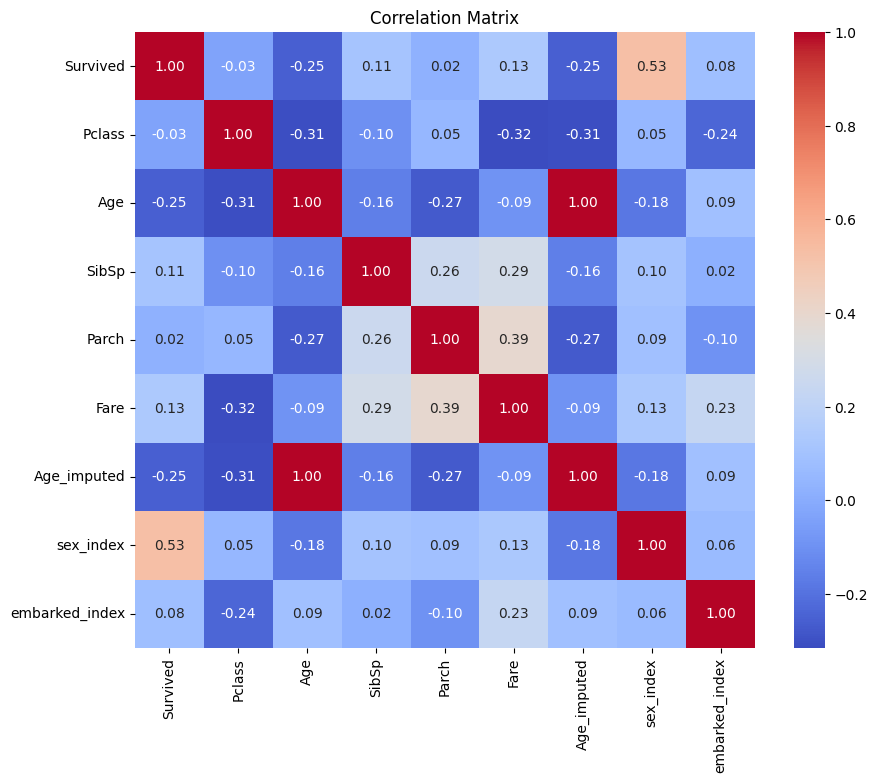

In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

# Drop rows with null values
df_titanic_filtered = df_num_titanic.dropna()

# Assemble into a single vector column 
numeric_features = [t[0] for t in df_titanic_filtered.dtypes if t[1] == 'int' or t[1] == 'double']
assembler = VectorAssembler(inputCols=numeric_features, outputCol="features")
vector_df_titanic = assembler.transform(df_titanic_filtered)

matrix = Correlation.corr(vector_df_titanic, "features").head()
corr_matrix = matrix[0].toArray()

# Convert to Pandas DataFrame 
corr_df_titanic = pd.DataFrame(corr_matrix, index=numeric_features, columns=numeric_features)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df_titanic, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

###Dropping Features

Cabin:
Reasons for Dropping: High percentage of missing values and possibly a complex relationship with survival that may require extensive data manipulation to uncover.

Ticket:
Reasons for Dropping:The ticket number by itself does not provide meaningful insights.

Name:
Reasons for Dropping: Primarily a unique identifier for each passenger, does not provide meaningful insights for the classification

PassengerId:
Reasons for Dropping: Does not contain usefull information, it is a sequential number given to the passengers, serving no predictive purpose.

In [0]:
# Drop unnecessary columns
df_titanic_clean = df_num_titanic.drop('PassengerId', 'Ticket', 'Cabin', 'Name', 'Embarked', 'Sex', 'Age')
print(df_titanic_clean.head(10))

[Row(Survived=0.0, Pclass=3.0, SibSp=1.0, Parch=0.0, Fare=7.25, Age_imputed=22.0, sex_index=0.0, embarked_index=0.0), Row(Survived=1.0, Pclass=1.0, SibSp=1.0, Parch=0.0, Fare=71.2833, Age_imputed=38.0, sex_index=1.0, embarked_index=1.0), Row(Survived=1.0, Pclass=3.0, SibSp=0.0, Parch=0.0, Fare=7.925, Age_imputed=26.0, sex_index=1.0, embarked_index=0.0), Row(Survived=1.0, Pclass=1.0, SibSp=1.0, Parch=0.0, Fare=53.1, Age_imputed=35.0, sex_index=1.0, embarked_index=0.0), Row(Survived=0.0, Pclass=3.0, SibSp=0.0, Parch=0.0, Fare=8.05, Age_imputed=35.0, sex_index=0.0, embarked_index=0.0), Row(Survived=0.0, Pclass=3.0, SibSp=0.0, Parch=0.0, Fare=8.4583, Age_imputed=29.69911764705882, sex_index=0.0, embarked_index=2.0), Row(Survived=0.0, Pclass=1.0, SibSp=0.0, Parch=0.0, Fare=51.8625, Age_imputed=54.0, sex_index=0.0, embarked_index=0.0), Row(Survived=0.0, Pclass=3.0, SibSp=3.0, Parch=1.0, Fare=21.075, Age_imputed=2.0, sex_index=0.0, embarked_index=0.0), Row(Survived=1.0, Pclass=3.0, SibSp=0.0,

#EDA

In [0]:
display(df_titanic_clean)

Survived,Pclass,SibSp,Parch,Fare,Age_imputed,sex_index,embarked_index
0.0,3.0,1.0,0.0,7.25,22.0,0.0,0.0
1.0,1.0,1.0,0.0,71.2833,38.0,1.0,1.0
1.0,3.0,0.0,0.0,7.925,26.0,1.0,0.0
1.0,1.0,1.0,0.0,53.1,35.0,1.0,0.0
0.0,3.0,0.0,0.0,8.05,35.0,0.0,0.0
0.0,3.0,0.0,0.0,8.4583,29.69911764705882,0.0,2.0
0.0,1.0,0.0,0.0,51.8625,54.0,0.0,0.0
0.0,3.0,3.0,1.0,21.075,2.0,0.0,0.0
1.0,3.0,0.0,2.0,11.1333,27.0,1.0,0.0
1.0,2.0,1.0,0.0,30.0708,14.0,1.0,1.0


Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

###Distribution of Numeric Features

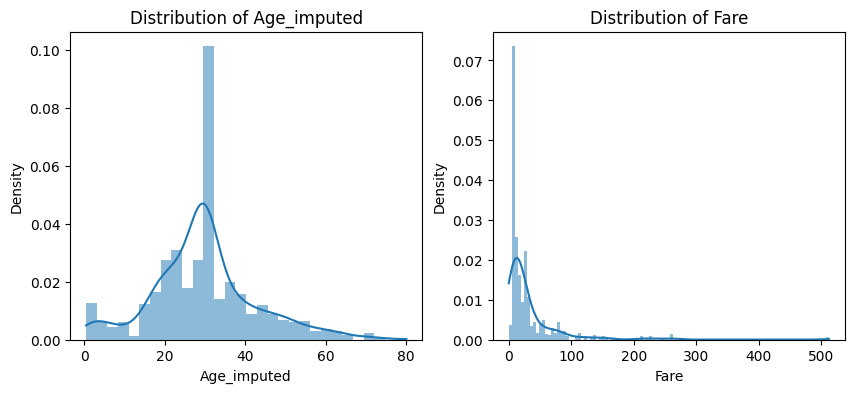

In [0]:
# Distribution of numeric features: Age_imputed and Fare.

pdf = df_titanic_clean.select('Age_imputed', 'Fare').toPandas()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(pdf['Age_imputed'].dropna(), kde=True, stat='density', linewidth=0)
plt.title('Distribution of Age_imputed')

plt.subplot(1, 2, 2)
sns.histplot(pdf['Fare'].dropna(), kde=True, stat='density', linewidth=0)
plt.title('Distribution of Fare')
plt.show()


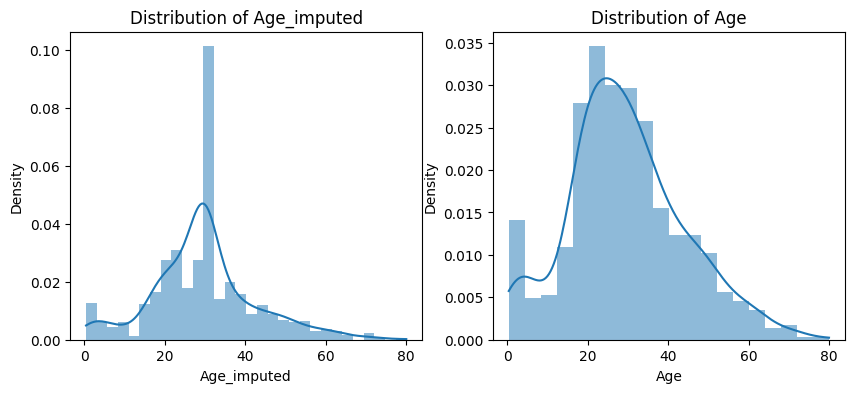

In [0]:
#Compare the distribution of Age_imputed vs. Age (original variable).

pdf = df_num_titanic.select('Age_imputed', 'Age').toPandas()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(pdf['Age_imputed'].dropna(), kde=True, stat='density', linewidth=0)
plt.title('Distribution of Age_imputed')

plt.subplot(1, 2, 2)
sns.histplot(pdf['Age'].dropna(), kde=True, stat='density', linewidth=0)
plt.title('Distribution of Age')
plt.show()

The comparison between the distributions of 'Age' and 'Age_imputed' reveals that imputation has introduced a prominent peak in the imputed data, reflecting the concentration of imputed values at this central age. This was essential for maintaining the completeness and increasing the statistical power of the dataset by allowing all passengers to be included in analyses that require no missing values. 

###Survival Rate by Categories

In [0]:
from pyspark.sql import functions as F

# Survival rate by Pclass
df_titanic_clean.groupBy('Pclass').agg((F.sum(F.when(F.col('Survived') == 1, 1).otherwise(0)) / F.count('*')).alias('Survival Rate')).show()

# Survival rate by Sex
df_titanic_clean.groupBy('sex_index').agg((F.sum(F.when(F.col('Survived') == 1, 1).otherwise(0)) / F.count('*')).alias('Survival Rate')).show()

# Survival rate by Embarked
df_titanic_clean.groupBy('embarked_index').agg((F.sum(F.when(F.col('Survived') == 1, 1).otherwise(0)) / F.count('*')).alias('Survival Rate')).show()

+------+-------------------+
|Pclass|      Survival Rate|
+------+-------------------+
|   1.0| 0.6261682242990654|
|   3.0|0.24236252545824846|
|   2.0|0.47282608695652173|
+------+-------------------+

+---------+-------------------+
|sex_index|      Survival Rate|
+---------+-------------------+
|      0.0|0.18890814558058924|
|      1.0| 0.7403846153846154|
+---------+-------------------+

+--------------+-------------------+
|embarked_index|      Survival Rate|
+--------------+-------------------+
|           0.0|0.33695652173913043|
|           1.0| 0.5535714285714286|
|           2.0|0.38961038961038963|
+--------------+-------------------+



###Correlation Matrix

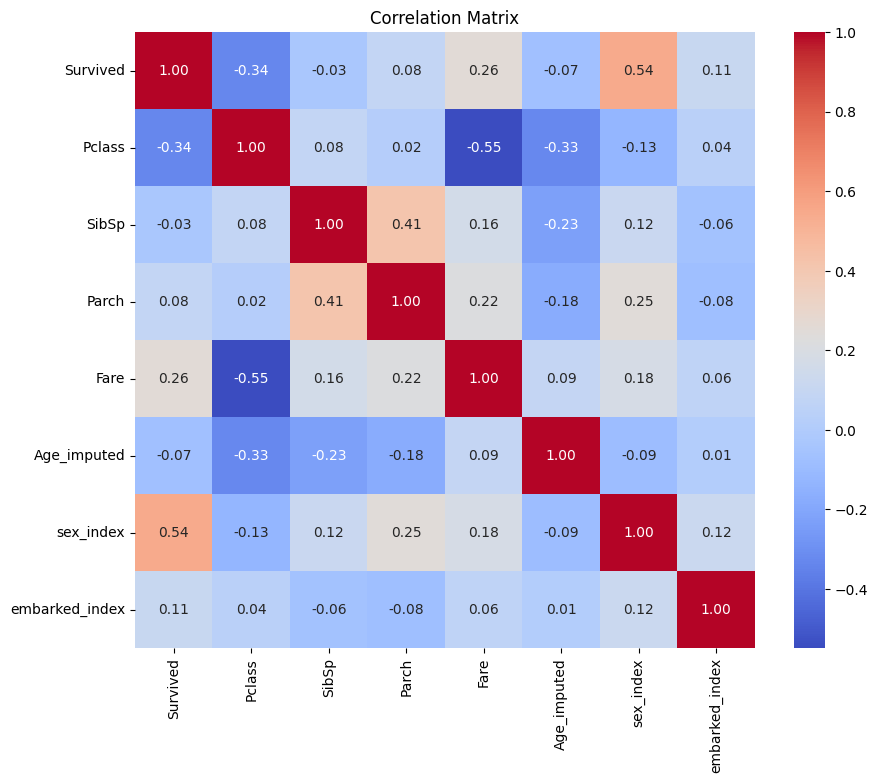

In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

# Drop rows with null values
df_titanic_filtered = df_titanic_clean.dropna()

numeric_features = [t[0] for t in df_titanic_filtered.dtypes if t[1] == 'int' or t[1] == 'double']
assembler = VectorAssembler(inputCols=numeric_features, outputCol="features")
vector_df_titanic = assembler.transform(df_titanic_filtered)

matrix = Correlation.corr(vector_df_titanic, "features").head()
corr_matrix = matrix[0].toArray()

corr_df_titanic = pd.DataFrame(corr_matrix, index=numeric_features, columns=numeric_features)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df_titanic, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Observarions:
The correlation matrix presents several notable relationships within our dataset. Firstly, there is a strong negative correlation (-0.34) between 'Survived' and 'Pclass', indicating that passengers in higher classes (lower number) had better survival odds. Another significant positive correlation (0.54) exists between 'Survived' and 'sex_index', suggesting survival rates were higher for females (coded as 1). 'Fare' also shows a notable negative correlation with 'Pclass' (-0.55), which is expected as higher classes generally paid more. 'Fare' positively correlates with 'Survived' (0.26), supporting the idea that passengers who paid more, had higher survival rates. The correlations involving 'Age_imputed' are relatively weak, suggesting that age, after imputation, may not have been a strong predictor of survival compared to gender and passenger class.

###Pair Plots

In [0]:
display(df_titanic_clean)

Survived,Pclass,SibSp,Parch,Fare,Age_imputed,sex_index,embarked_index
0.0,3.0,1.0,0.0,7.25,22.0,0.0,0.0
1.0,1.0,1.0,0.0,71.2833,38.0,1.0,1.0
1.0,3.0,0.0,0.0,7.925,26.0,1.0,0.0
1.0,1.0,1.0,0.0,53.1,35.0,1.0,0.0
0.0,3.0,0.0,0.0,8.05,35.0,0.0,0.0
0.0,3.0,0.0,0.0,8.4583,29.69911764705882,0.0,2.0
0.0,1.0,0.0,0.0,51.8625,54.0,0.0,0.0
0.0,3.0,3.0,1.0,21.075,2.0,0.0,0.0
1.0,3.0,0.0,2.0,11.1333,27.0,1.0,0.0
1.0,2.0,1.0,0.0,30.0708,14.0,1.0,1.0


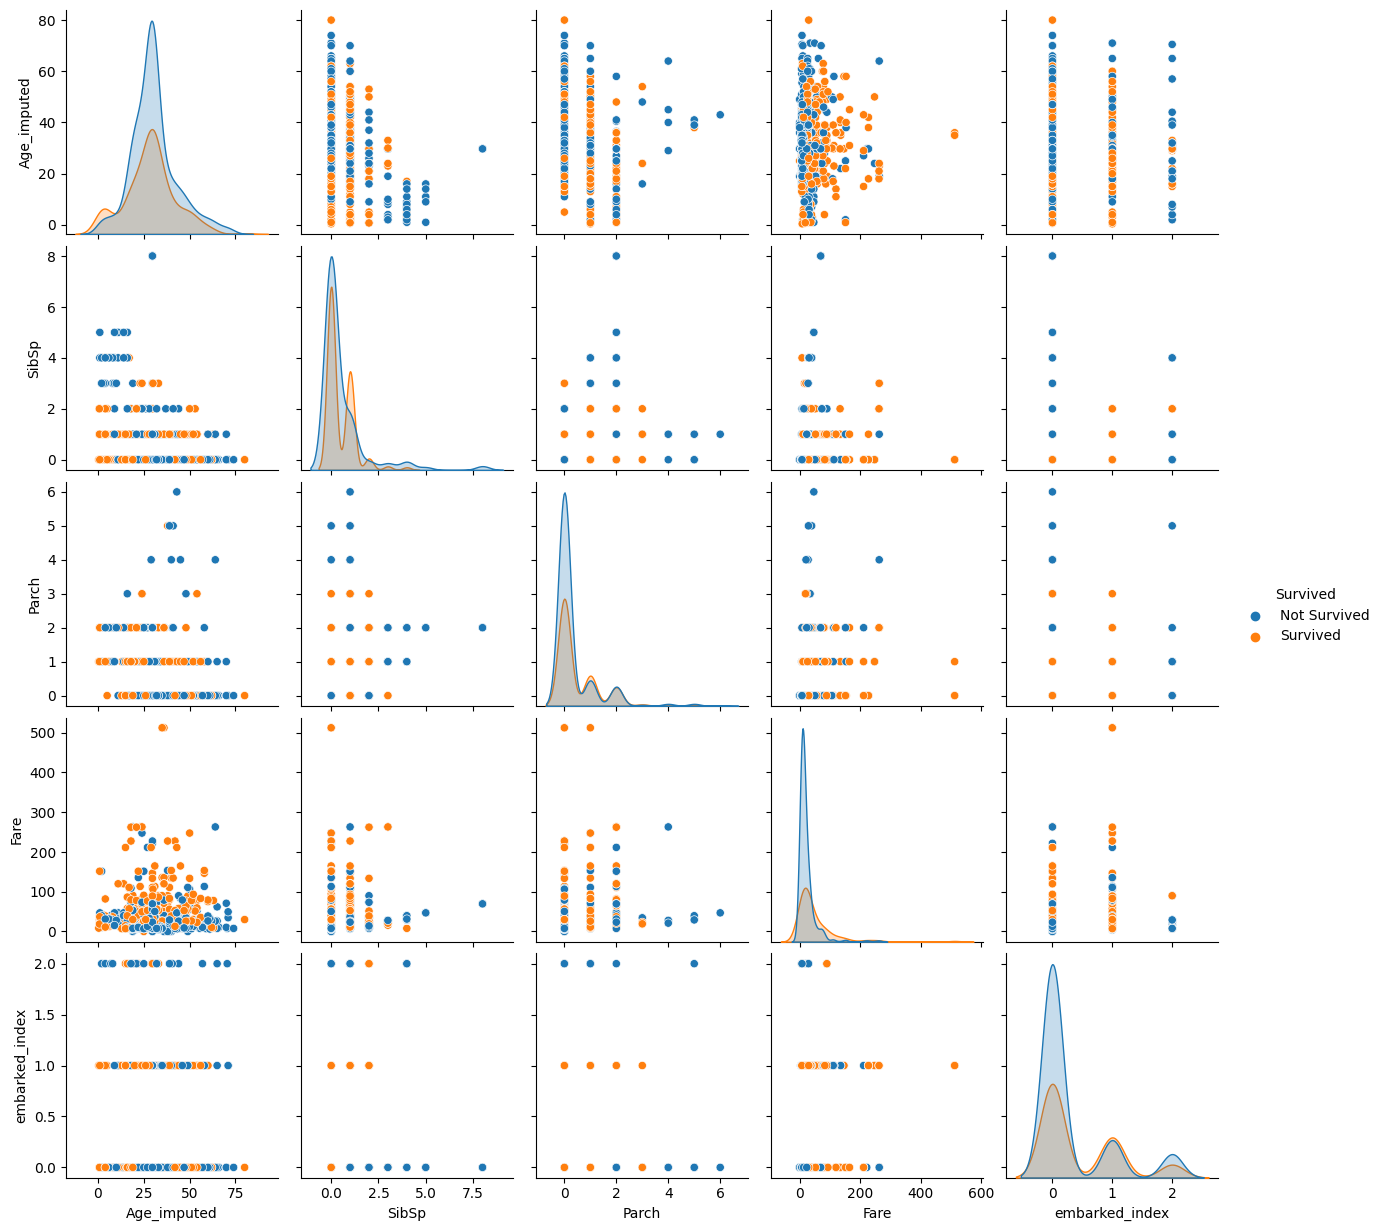

In [0]:
# Selected columns for pair plots
selected_columns = df_titanic_clean.select('Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Age_imputed', 'sex_index', 'embarked_index')
pair_pdf = selected_columns.toPandas()

# 'Survived' and 'Pclass' to categorical
pair_pdf['Survived'] = pair_pdf['Survived'].apply(lambda x: 'Survived' if x == 1 else 'Not Survived')
pair_pdf['Pclass'] = pair_pdf['Pclass'].astype(str)

sns.pairplot(pair_pdf, hue='Survived', vars=['Age_imputed', 'SibSp', 'Parch', 'Fare', 'embarked_index'])
plt.show()

##Family vs. Survival rate

In [0]:
from pyspark.sql.functions import col

#New df adding 'FamilySize' column
df_family_size = df_titanic_clean.withColumn('FamilySize', col('SibSp') + col('Parch'))


In [0]:
display(df_family_size)

Survived,Pclass,SibSp,Parch,Fare,Age_imputed,sex_index,embarked_index,FamilySize
0.0,3.0,1.0,0.0,7.25,22.0,0.0,0.0,1.0
1.0,1.0,1.0,0.0,71.2833,38.0,1.0,1.0,1.0
1.0,3.0,0.0,0.0,7.925,26.0,1.0,0.0,0.0
1.0,1.0,1.0,0.0,53.1,35.0,1.0,0.0,1.0
0.0,3.0,0.0,0.0,8.05,35.0,0.0,0.0,0.0
0.0,3.0,0.0,0.0,8.4583,29.69911764705882,0.0,2.0,0.0
0.0,1.0,0.0,0.0,51.8625,54.0,0.0,0.0,0.0
0.0,3.0,3.0,1.0,21.075,2.0,0.0,0.0,4.0
1.0,3.0,0.0,2.0,11.1333,27.0,1.0,0.0,2.0
1.0,2.0,1.0,0.0,30.0708,14.0,1.0,1.0,1.0


In [0]:
from pyspark.sql.functions import col, sum, count

family_survival_rate = df_family_size.groupBy('FamilySize').agg((sum(col('Survived')) / count(col('Survived'))).alias('Survival Rate'))

display(family_survival_rate)

FamilySize,Survival Rate
0.0,0.30093457943925234
7.0,0.0
1.0,0.5527950310559007
4.0,0.2
3.0,0.7241379310344828
2.0,0.5784313725490197
10.0,0.0
6.0,0.3333333333333333
5.0,0.13636363636363635


Databricks visualization. Run in Databricks to view.

In [0]:
#Alone column
df_family_size = df_family_size.withColumn('Alone', col('FamilySize') == 0)

display(df_family_size)

Survived,Pclass,SibSp,Parch,Fare,Age_imputed,sex_index,embarked_index,FamilySize,Alone
0.0,3.0,1.0,0.0,7.25,22.0,0.0,0.0,1.0,false
1.0,1.0,1.0,0.0,71.2833,38.0,1.0,1.0,1.0,false
1.0,3.0,0.0,0.0,7.925,26.0,1.0,0.0,0.0,true
1.0,1.0,1.0,0.0,53.1,35.0,1.0,0.0,1.0,false
0.0,3.0,0.0,0.0,8.05,35.0,0.0,0.0,0.0,true
0.0,3.0,0.0,0.0,8.4583,29.69911764705882,0.0,2.0,0.0,true
0.0,1.0,0.0,0.0,51.8625,54.0,0.0,0.0,0.0,true
0.0,3.0,3.0,1.0,21.075,2.0,0.0,0.0,4.0,false
1.0,3.0,0.0,2.0,11.1333,27.0,1.0,0.0,2.0,false
1.0,2.0,1.0,0.0,30.0708,14.0,1.0,1.0,1.0,false


Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

In [0]:
# Survival Rate for Alone vs With Family
alone_survival_rate = df_family_size.groupBy('Alone').agg((sum(col('Survived'))/count(col('Survived'))).alias('Survival Rate'))

display(alone_survival_rate)

Alone,Survival Rate
true,0.30093457943925234
false,0.5056497175141242


##Class vs Survival rate

In [0]:
from pyspark.sql.functions import col, expr
from pyspark.sql import SparkSession

survival_by_class = df_titanic_clean.groupBy("Pclass") \
                      .agg(
                          sum(col("Survived")).alias("Total_Survived"),
                          count(col("Survived")).alias("Total_Passengers"),
                          (sum(col("Survived")) / count(col("Survived"))).alias("Survival_Rate")
                      ) \
                      .orderBy("Pclass")

display(survival_by_class)

Pclass,Total_Survived,Total_Passengers,Survival_Rate
1.0,134.0,214,0.6261682242990654
2.0,87.0,184,0.47282608695652173
3.0,119.0,491,0.24236252545824846


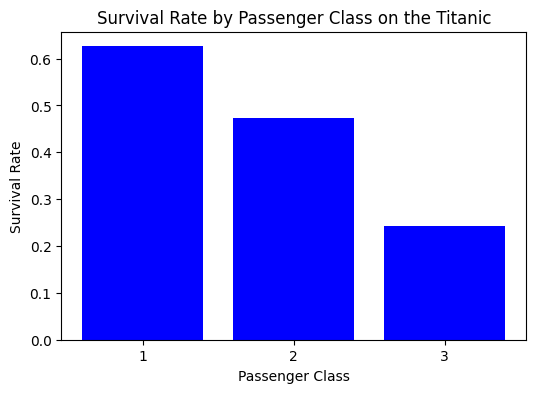

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert Spark DataFrame to Pandas
pandas_df = survival_by_class.toPandas()

# Create a bar chart for Survival Rate by Class
plt.figure(figsize=(6, 4))
plt.bar(pandas_df['Pclass'], pandas_df['Survival_Rate'], color='b')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class on the Titanic')
plt.xticks(pandas_df['Pclass'])
plt.show()


##Fare vs Survival Rate

In [0]:
from pyspark.sql.functions import col, when

fare_brackets = df_titanic_clean.withColumn(
    "FareBracket",
    when(col("Fare") <= 50, "0-50")
    .when((col("Fare") > 50) & (col("Fare") <= 100), "51-100")
    .when((col("Fare") > 100) & (col("Fare") <= 150), "101-150")
    .when((col("Fare") > 150) & (col("Fare") <= 200), "151-200")
    .when((col("Fare") > 200) & (col("Fare") <= 250), "201-250")
    .when((col("Fare") > 250) & (col("Fare") <= 300), "251-300")
    .when(col("Fare") > 300, "301+")
)
# Adding an explicit sorting column
fare_brackets = fare_brackets.withColumn(
    "SortKey",
    when(col("FareBracket") == "0-50", 0)
    .when(col("FareBracket") == "51-100", 1)
    .when(col("FareBracket") == "101-150", 2)
    .when(col("FareBracket") == "151-200", 3)
    .when(col("FareBracket") == "201-250", 4)
    .when(col("FareBracket") == "251-300", 5)
    .when(col("FareBracket") == "301+", 6)
)

In [0]:
# Aggregating data by FareBracket and SortKey
fare_survival_rates = fare_brackets.groupBy("FareBracket", "SortKey") \
    .agg(
        (sum(col("Survived")) / count(col("Survived"))).alias("SurvivalRate")
    ) \
    .orderBy("SortKey")

FareBracket,SortKey,SurvivalRate
0-50,0,0.31874145006839943
51-100,1,0.6476190476190476
101-150,2,0.7916666666666666
151-200,3,0.6666666666666666
201-250,4,0.6363636363636364
251-300,5,0.6666666666666666
301+,6,1.0


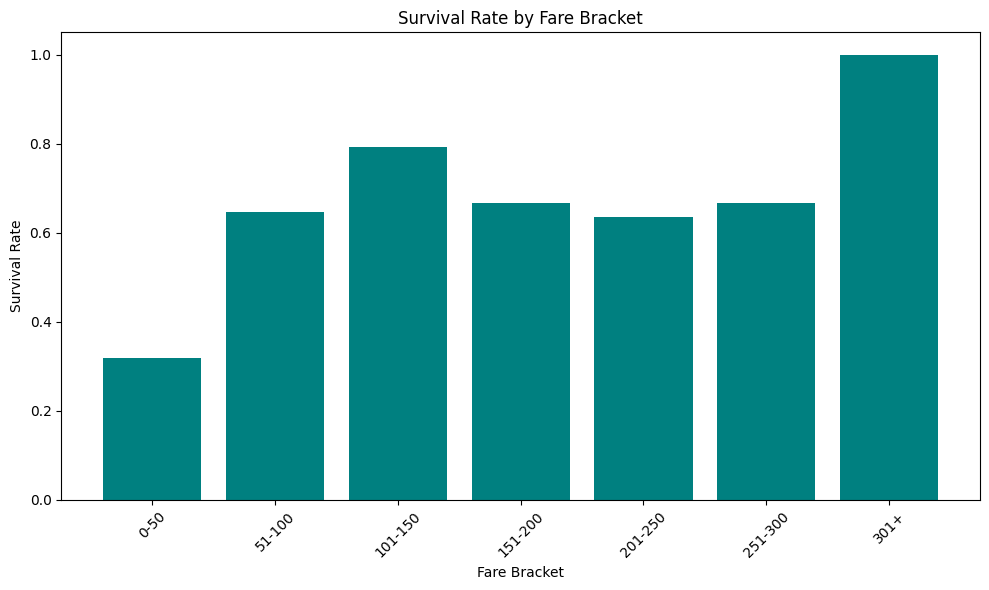

In [0]:
display(fare_survival_rates)

fare_survival_rates_pd = fare_survival_rates.toPandas()  # Convert to Pandas DataFrame for visualization

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(fare_survival_rates_pd['FareBracket'], fare_survival_rates_pd['SurvivalRate'], color='teal')
plt.xlabel('Fare Bracket')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Fare Bracket')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Conclusions - EDA

This analysis revealed a distinct correlation between different variables and survival rates. 

The data from your analysis on the influence of family presence aboard the Titanic reveals significant insights into survival rates. Passengers who were not alone, those with family aboard, had a higher survival rate (approximately 50.6%) compared to those who were alone (approximately 30.1%). The bar chart and pie charts above distinctly show this trend, indicating that having family members onboard could have provided practical advantages in emergency situations, such as assisting each other during the evacuation process.

Regarding gender, the analysis showed it had a significant impact on survival rates. The survival rate for females (sex_index = 1) was substantially higher at approximately 74%, compared to just about 19% for males (sex_index = 0). This disparity is reflected in the bar chart above where the number of female survivors far exceeds that of male survivors. This trend is indicative of the "women and children first" protocol that was commonly followed during such emergencies, leading to a higher proportion of women being saved.

Passengers who paid higher fares and were in 1st class generally had better survival chances, likely due to superior access to lifeboats and priority during evacuation. The data underscores a significant socio-economic divide in survival probabilities, with the highest rates observed in the upper fare brackets, reflecting disparities in emergency resource access and cabin location.



#Assembler for Classification Models

In [0]:
# PySPark Libraries
from pyspark.mllib.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import LinearSVC
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [0]:
df_titanic_clean.printSchema

<bound method DataFrame.printSchema of DataFrame[Survived: double, Pclass: double, SibSp: double, Parch: double, Fare: double, Age_imputed: double, sex_index: double, embarked_index: double]>

In [0]:
from pyspark.mllib.linalg import Vectors 
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import StandardScaler
from pyspark.sql.functions import col

assembler_A = VectorAssembler(
inputCols= [
    'Pclass', 'Age_imputed', 'SibSp', 'Parch', 'Fare', 'sex_index', 'embarked_index' 
],
outputCol = 'assembled_features'
)

df_titanic_1 = assembler_A.transform(df_titanic_clean)
df_titanic_1.printSchema



<bound method DataFrame.printSchema of DataFrame[Survived: double, Pclass: double, SibSp: double, Parch: double, Fare: double, Age_imputed: double, sex_index: double, embarked_index: double, assembled_features: vector]>

In [0]:
df_titanic_1.take(5)

[Row(Survived=0.0, Pclass=3.0, SibSp=1.0, Parch=0.0, Fare=7.25, Age_imputed=22.0, sex_index=0.0, embarked_index=0.0, assembled_features=DenseVector([3.0, 22.0, 1.0, 0.0, 7.25, 0.0, 0.0])),
 Row(Survived=1.0, Pclass=1.0, SibSp=1.0, Parch=0.0, Fare=71.2833, Age_imputed=38.0, sex_index=1.0, embarked_index=1.0, assembled_features=DenseVector([1.0, 38.0, 1.0, 0.0, 71.2833, 1.0, 1.0])),
 Row(Survived=1.0, Pclass=3.0, SibSp=0.0, Parch=0.0, Fare=7.925, Age_imputed=26.0, sex_index=1.0, embarked_index=0.0, assembled_features=DenseVector([3.0, 26.0, 0.0, 0.0, 7.925, 1.0, 0.0])),
 Row(Survived=1.0, Pclass=1.0, SibSp=1.0, Parch=0.0, Fare=53.1, Age_imputed=35.0, sex_index=1.0, embarked_index=0.0, assembled_features=DenseVector([1.0, 35.0, 1.0, 0.0, 53.1, 1.0, 0.0])),
 Row(Survived=0.0, Pclass=3.0, SibSp=0.0, Parch=0.0, Fare=8.05, Age_imputed=35.0, sex_index=0.0, embarked_index=0.0, assembled_features=SparseVector(7, {0: 3.0, 1: 35.0, 4: 8.05}))]

###Training and test set random split 


In [0]:

# Perform 80-20 split
(train_df, test_df) = df_titanic_1.randomSplit([0.8, 0.2], seed=42) #check the df here
train_df.printSchema()
train_df.show(5)
train_df.describe().show()

root
 |-- Survived: double (nullable = true)
 |-- Pclass: double (nullable = true)
 |-- SibSp: double (nullable = true)
 |-- Parch: double (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Age_imputed: double (nullable = true)
 |-- sex_index: double (nullable = false)
 |-- embarked_index: double (nullable = false)
 |-- assembled_features: vector (nullable = true)

+--------+------+-----+-----+----+-----------------+---------+--------------+--------------------+
|Survived|Pclass|SibSp|Parch|Fare|      Age_imputed|sex_index|embarked_index|  assembled_features|
+--------+------+-----+-----+----+-----------------+---------+--------------+--------------------+
|     0.0|   1.0|  0.0|  0.0| 0.0|29.69911764705882|      0.0|           0.0|(7,[0,1],[1.0,29....|
|     0.0|   1.0|  0.0|  0.0| 0.0|29.69911764705882|      0.0|           0.0|(7,[0,1],[1.0,29....|
|     0.0|   1.0|  0.0|  0.0| 0.0|             39.0|      0.0|           0.0|(7,[0,1],[1.0,39.0])|
|     0.0|   1.0|  0.0|  0.0| 

In [0]:
train_df.describe().head()

Row(summary='count', Survived='744', Pclass='744', SibSp='744', Parch='744', Fare='744', Age_imputed='744', sex_index='744', embarked_index='744')

In [0]:
print(train_df.columns)


['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Age_imputed', 'sex_index', 'embarked_index', 'features']


In [0]:
train_df.dtypes

[('Survived', 'double'),
 ('Pclass', 'double'),
 ('SibSp', 'double'),
 ('Parch', 'double'),
 ('Fare', 'double'),
 ('Age_imputed', 'double'),
 ('sex_index', 'double'),
 ('embarked_index', 'double'),
 ('assembled_features', 'vector')]

## Training Models to Determine the Best Performing One

Five machine learning models were trained on a designated training dataset. Following the training phase, all models underwent a rigorous evaluation process using a separate test dataset to ensure generalizability. This evaluation employed key performance metrics, including the Area Under the ROC Curve (AUC) to assess overall classification performance, True Positive Rate (TPR) to identify the effectiveness in correctly predicting positive cases, and False Positive Rate (FPR) to gauge the model's tendency to incorrectly classify negative cases. Based on this comprehensive evaluation, the model demonstrating the most optimal performance in predicting the target variable will be selected for further analysis.

##Logistic Regression

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Pipeline for data to use for all models 
pipeline_A = Pipeline(stages=[assembler_A])

lr = LogisticRegression(labelCol='Survived', featuresCol='assembled_features')
pipeline_LR = Pipeline(stages=[pipeline_A, lr])


# ParamGridBuilder
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 1.0]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.1, 0.5]) \
    .build()

# Defining the evaluator for model selection (Binary Classification)
evaluator = BinaryClassificationEvaluator(metricName="areaUnderROC")
lrevaluator = BinaryClassificationEvaluator(metricName="areaUnderROC", labelCol="Survived")

# Create a CrossValidator instance
lrcv = CrossValidator(estimator=pipeline_LR, evaluator=lrevaluator, estimatorParamMaps=paramGrid)

model_LR = lrcv.fit(train_df)

from pyspark.ml.classification import LogisticRegressionModel

# Fetch the best model
best_model = model_LR.bestModel

# Access the logistic regression stage in the pipeline
lr_model = best_model.stages[-1] 

# Print the best hyperparameters
print("Best RegParam: ", lr_model._java_obj.getRegParam())
print("Best ElasticNetParam: ", lr_model._java_obj.getElasticNetParam())

# Evaluate the best model on a test set
train_results = best_model.transform(train_df)

# Compute the area under ROC on test data
auc = lrevaluator.evaluate(train_results)
print("Area under ROC for training data: ", auc)


Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Best RegParam:  0.1
Best ElasticNetParam:  0.0
Area under ROC:  0.8561760511812542


###Linear SVC

In [0]:

from pyspark.ml.classification import LinearSVC

# Pipeline for data to use for all models
pipeline_A = Pipeline(stages=[assembler_A])

# Define LinearSVC model
svc = LinearSVC(labelCol='Survived', featuresCol='assembled_features')

# Combine pipeline_A and svc in a single pipeline
pipeline_SVC = Pipeline(stages=[pipeline_A, svc])

# ParamGridBuilder for LinearSVC hyperparameters
paramGrid = ParamGridBuilder() \
  .addGrid(svc.regParam, [0.01, 0.1, 1.0]) \
  .build()  # No elasticNetParam for LinearSVC

# Define the evaluator for model selection (Binary Classification)
lrevaluator = BinaryClassificationEvaluator(metricName="areaUnderROC", labelCol="Survived")

# Create a CrossValidator instance
SVC_cv = CrossValidator(estimator=pipeline_SVC, evaluator=lrevaluator, estimatorParamMaps=paramGrid)

# Fit the CrossValidator
model_SVC = SVC_cv.fit(train_df)

# Predictions
svc_predictions = model_SVC.transform(train_df)

# Fetch the best model
best_model = model_SVC.bestModel

# Access the LinearSVC stage in the pipeline 
svc_model = best_model.stages[-1]  

# Print the best hyperparameters (example)
print("Best RegParam: ", svc_model._java_obj.getRegParam())

# Evaluation on training data (for informational purposes only)

training_auc = lrevaluator.evaluate(svc_predictions)
print("Training AUC:", training_auc)


Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Best RegParam:  1.0
Training AUC: 0.8508421012063048


## Decision Tree

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier


# Pipeline for data to use for all models
pipeline_A = Pipeline(stages=[assembler_A])

# Set up Decision Tree Classifier
dt = DecisionTreeClassifier(labelCol='Survived', featuresCol='assembled_features')
pipeline_DT = Pipeline(stages=[pipeline_A, dt])

# ParamGridBuilder for Decision Tree
paramGrid = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [2, 5, 10, 20]) \
    .addGrid(dt.minInstancesPerNode, [1, 2, 4]) \
    .build()

# Binary Classification
evaluator = BinaryClassificationEvaluator(labelCol="Survived", metricName="areaUnderROC")

# Create a CrossValidator instance
dtcv = CrossValidator(estimator=pipeline_DT, evaluator=evaluator, estimatorParamMaps=paramGrid, numFolds=5)

# Fit the model
model_DT = dtcv.fit(train_df)

# Fetch the best model
best_model = model_DT.bestModel

# Access the decision tree stage in the pipeline
dt_model = best_model.stages[-1]  

# Print the best hyperparameters
print("Best maxDepth: ", dt_model.getMaxDepth())
print("Best minInstancesPerNode: ", dt_model.getMinInstancesPerNode())

# Evaluate the best model on a train set
train_results = best_model.transform(train_df)

# Compute the area under ROC on train data
auc = evaluator.evaluate(train_results)
print(" Training AUC ", auc)



Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Best maxDepth:  20
Best minInstancesPerNode:  1
 Training AUC  0.9719736385709331


## Multilayer Perceptron

In [0]:

from pyspark.ml.classification import MultilayerPerceptronClassifier


# Pipeline for data to use for all models
pipeline_A = Pipeline(stages=[assembler_A])

# Define Multilayer Perceptron Classifier
mlp = MultilayerPerceptronClassifier(labelCol='Survived', featuresCol='assembled_features', layers=[7, 2])

# Combine pipeline_A and mlp in a single pipeline
pipeline_MLP = Pipeline(stages=[pipeline_A, mlp])

# ParamGridBuilder for MLP hyperparameters
paramGrid = ParamGridBuilder() \
  .addGrid(mlp.maxIter, [50, 100]) \
  .addGrid(mlp.stepSize, [0.1, 0.01]) \
  .build()

# Define the evaluator for model selection (Binary Classification)
evaluator = BinaryClassificationEvaluator(metricName="areaUnderROC", labelCol="Survived")

# Create a CrossValidator instance
MLP_cv = CrossValidator(estimator=pipeline_MLP, evaluator=evaluator, estimatorParamMaps=paramGrid)

# Fit the CrossValidator
model_MLP = MLP_cv.fit(train_df)

# Fetch the best model
best_model = model_MLP.bestModel

# Access the MLP stage in the pipeline 
mlp_model = best_model.stages[-1]

# Print the best hyperparameters 
print("Best Max Iterations: ", mlp_model._java_obj.getMaxIter())
print("Best Step Size: ", mlp_model._java_obj.getStepSize())

# Evaluate the best model on a test set (not training data)
train_results = best_model.transform(train_df)  

# Compute the area under ROC on test data
auc = evaluator.evaluate(train_results)
print("Training AUC: ", auc)


Best Max Iterations:  100
Best Step Size:  0.1
Training AUC:  0.4152387559255406


##Random Forest 

In [0]:
from pyspark.ml.classification import RandomForestClassifier

# Pipeline for data to use for all models
pipeline_A = Pipeline(stages=[assembler_A])

# Define Random Forest Classifier
rf = RandomForestClassifier(labelCol='Survived', featuresCol='assembled_features', numTrees=100)  # Example number of trees

# Combine pipeline_A and rf in a single pipeline
pipeline_RF = Pipeline(stages=[pipeline_A, rf])

# ParamGridBuilder for Random Forest hyperparameters
paramGrid = ParamGridBuilder() \
  .addGrid(rf.numTrees, [10, 50, 100]) \
  .addGrid(rf.maxDepth, [4, 6, 8]) \
  .build()

# Binary Classification
evaluator = BinaryClassificationEvaluator(metricName="areaUnderROC", labelCol="Survived")

# Create a CrossValidator instance
RF_cv = CrossValidator(estimator=pipeline_RF, evaluator=evaluator, estimatorParamMaps=paramGrid)

# Fit the CrossValidator
model_RF = RF_cv.fit(train_df)

# Fetch the best model
best_model = model_RF.bestModel

# Access the Random Forest stage in the pipeline 
rf_model = best_model.stages[-1]

# Print the best hyperparameters 
print("Best Number of Trees: ", rf_model._java_obj.getNumTrees())
print("Best Max Depth: ", rf_model._java_obj.getMaxDepth())

# Evaluate the best model on a test set 
train_results = best_model.transform(train_df)
auc = evaluator.evaluate(train_results)
print("Training AUC: ", auc)


Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Best Number of Trees:  50
Best Max Depth:  6
Training AUC:  0.9291247543068566


##Model Comparison Using Test Data

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator


evaluator = BinaryClassificationEvaluator(metricName="areaUnderROC", labelCol="Survived")

models = [model_MLP, model_DT, model_SVC, model_LR, model_RF]
model_names = ["MultilayerPerceptronClassifier", "DecisionTreeClassifier", "LinearSVC", "LogisticRegression", "RandomForestClassifier" ]


for i in range(0,len(model_names)):
    predictionsTest = models[i].transform(test_df)
    auc = evaluator.evaluate(predictionsTest)
    print (model_names[i] + str(" AUC on test set ") + str(auc))

MultilayerPerceptronClassifier AUC on test set 0.40651834504293516
DecisionTreeClassifier AUC on test set 0.7823965651834504
LinearSVC AUC on test set 0.8292349726775957
LogisticRegression AUC on test set 0.8389929742388756
RandomForestClassifier AUC on test set 0.8644613583138174


MultilayerPerceptronClassifier AUC on test set: 0.40651834504293516
DecisionTreeClassifier AUC on test set: 0.7823965651834504
LinearSVC AUC on test set: 0.8292349726775957
LogisticRegression AUC on test set: 0.8389929742388756
RandomForestClassifier AUC on test set: 0.8644613583138174


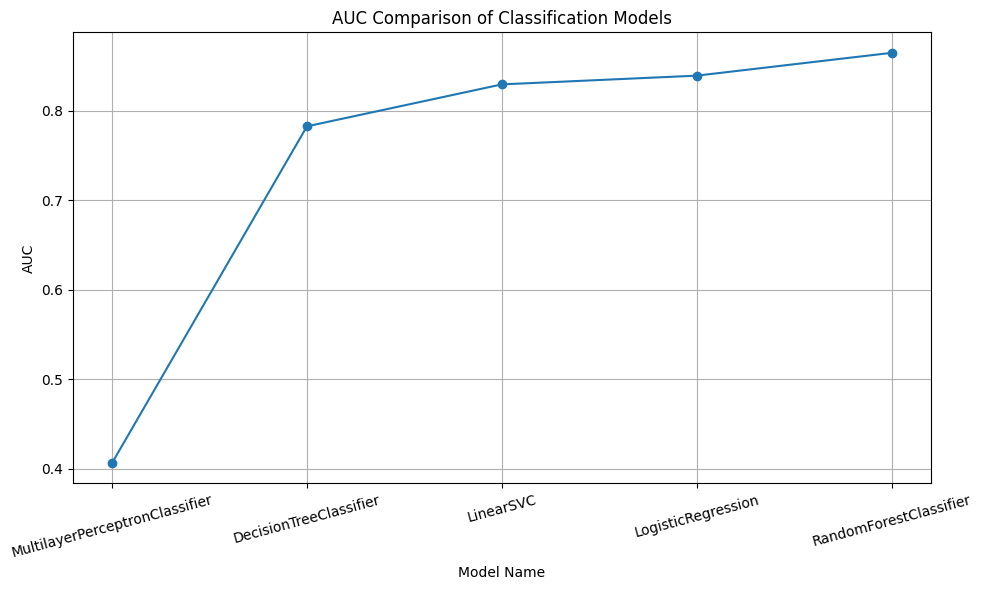

In [0]:
import matplotlib.pyplot as plt

# Define an empty list to store AUC values for each model
auc_values = []

# Loop through each model and its name
for i, model_name in enumerate(model_names):
  # Transform the test data using the current model
  predictions_test = models[i].transform(test_df)
  
  # Evaluate the model using the BinaryClassificationEvaluator
  auc = evaluator.evaluate(predictions_test)
  
  # Append the AUC value to the list
  auc_values.append(auc)
  
  # Print the AUC for the current model
  print(f"{model_name} AUC on test set: {auc}")

# Plotting the AUC Curve (requires matplotlib)
plt.figure(figsize=(10, 6))  
plt.plot(model_names, auc_values, marker='o', linestyle='-')
plt.xlabel("Model Name")
plt.ylabel("AUC")
plt.title("AUC Comparison of Classification Models")
plt.xticks(rotation=15)
plt.grid(True)
plt.tight_layout()
plt.show()


MultilayerPerceptronClassifier AUC on test set: 0.7609289617486338
DecisionTreeClassifier AUC on test set: 0.7348750975800158
LinearSVC AUC on test set: 0.6721311475409836
LogisticRegression AUC on test set: 0.7601483216237315
RandomForestClassifier AUC on test set: 0.8085480093676815


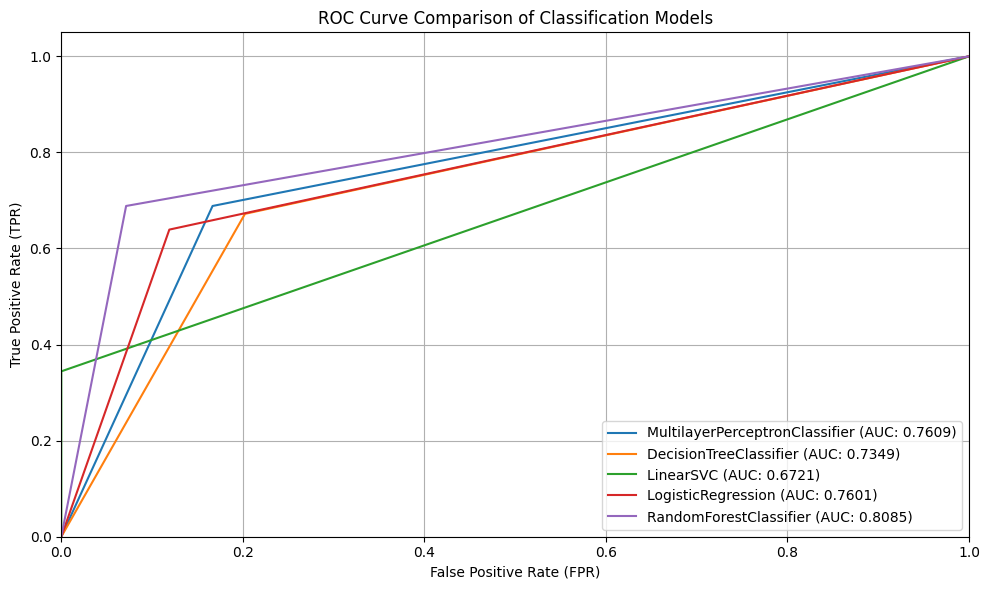

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc  

# Define an empty dictionary to store ROC curves for each model
roc_curves = {}

# Loop through each model and its name
for i, model_name in enumerate(model_names):
  # Transform the test data using the current model
  predictions_test = models[i].transform(test_df)
  
  # Extract labels and predictions for ROC curve calculation
  true_labels = predictions_test.select("Survived").rdd.flatMap(lambda x: x).collect()
  predicted_labels = predictions_test.select("prediction").rdd.flatMap(lambda x: x).collect()
  
  # Calculate ROC curve
  fpr, tpr, threshold = roc_curve(true_labels, predicted_labels)
  roc_auc = auc(fpr, tpr)
  
  # Store ROC curve data in the dictionary
  roc_curves[model_name] = (fpr, tpr, roc_auc)
  
  # Print the AUC for the current model
  print(f"{model_name} AUC on test set: {roc_auc}")

# Plotting ROC Curves using seaborn
plt.figure(figsize=(10, 6)) 
for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
  plt.plot(fpr, tpr, label=f"{model_name} (AUC: {roc_auc:.4f})")
  
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison of Classification Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05]) 
plt.tight_layout()
plt.show()


###Evaluation of the candidate models using metrics like AUC, TPR, and FPR revealed that the Random Forest model achieved the most favorable performance. Consequently, it will be chosen for this classification task.

Additional Comments and Discussion: The Multilayer Perceptron (MLP) model exhibited an interesting characteristic. While its Area Under the ROC Curve (AUC) score indicated lower performance, it achieved a high value on the ROC curve itself. This suggests potential for improvement in the MLP model's calibration, which could bring its AUC score closer to its ROC curve performance. Further investigation into hyperparameter tuning or regularization techniques might be beneficial for the MLP model for a more comprehensive model comparison. 
